In [1]:
import numpy as np
def map_clip(old,coup,bias,a,b,noi):   #linear map with clipping
    return np.clip( a*old+b*np.dot(coup,old)+.40*b*bias+np.random.normal(0,noi,len(old)),-.4,.4)
def ising_energy(stuff,ad,bias):
    return -0.5*1*np.dot(stuff,np.dot(ad,stuff))-np.sum(np.dot(bias,stuff))
def ising_sample(array,NN,n_hid,noise,_a,_b):   
    global result
    global ens2
    global ad
    global chain
    global bias
    # test=np.loadtxt(r'bla.txt') #edge list
    # print(test.type)
    test=np.array(array)
    N=int(np.max(test)) #number of nodes
    ad=np.zeros((N,N)) #adjacency matrix
    for i in range(0,len(test)): #initialize
        ad[int(test[i,0])-1,int(test[i,1])-1]+=(test[i,2])
    bias=np.zeros(N)
    for i in range(0,N):
        bias[i]+=ad[i,i]
        ad[i,i]=0
    # parameters for alpha and beta
    a=_a
    b=_b
    noise_strength=noise
    chain=np.zeros(N)
    ens2=np.zeros(NN)
    result=[]
    for i in range(0,NN):
        chain=map_clip(chain,ad,bias,a,b,noise_strength)
        chain_a=np.sign(chain)
        ens2[i]=ising_energy(chain_a,ad,bias)
        result.append(ens2[i])
    result=np.array(result)
    return result
##计算频率的函数
def calculate(array):
    counter = Counter(array)
    numbers = np.array(list(counter.keys()))  # 数的大小
    frequencies = np.array(list(counter.values()))  # 频率
    all_counts=np.sum(frequencies)
    P=frequencies/all_counts
        # 将 numbers 和 P 配对
    paired = list(zip(numbers, P))
    # 按 numbers 的值进行排序（默认升序）
    paired_sorted = sorted(paired, key=lambda x: x[0])
    # 解压排序后的结果
    numbers, P= zip(*paired_sorted)
    return np.array(numbers),np.array(P)

In [3]:
import numpy as np
k=1
T=3.4
flip_prob=(np.exp(-(4)/(k*T)))
ens=np.zeros(0)
def ising_energy(stuff,ad,bias):
    return -0.5*1*np.dot(stuff,np.dot(ad,stuff))-np.sum(np.dot(bias,stuff))
def flip2(e_new,e_old,new,old):
    flip_prob=(np.exp(-(e_new-e_old)/(k*T)))
    if(np.random.rand()<flip_prob):
        return new
    else:
        return old
def flip(stuff,index,ad,bias):
    temp=np.copy(stuff)
    temp[index]=-1*temp[index]
    temp_energy=ising_energy(temp,ad,bias)
    energy=ising_energy(stuff,ad,bias)
    global ens
    #ens=np.append(ens,energy)
    if(temp_energy<=energy):
        return temp
    else:
        return flip2(temp_energy,energy,temp,stuff)
    
def mcmc_sample(NN,n_hid,array):   
    test=array #edge list
    N=int(np.max(test)) #number of nodes
    ad=np.zeros((N,N)) #adjacency matrix
    for i in range(0,len(test)): #initialize
        ad[int(test[i,0])-1,int(test[i,1])-1]+=(test[i,2])
    bias=np.zeros((N,N))
    for i in range(0,N):
        bias[i,i]+=ad[i,i]
        ad[i,i]=0
    #doblit=True
    chain=np.sign(np.random.rand(N)*2+0.01-1)
    ens2=np.zeros((N,int(NN/1-1000)))
    #chain=np.zeros(N)
    result=[]
    for i in range(0,NN):
        #chain=flip(chain,int(np.random.rand()*N))    #random update order
        chain=flip(chain,i%N,ad,bias)   #typewirter update order, does not work well in 1D, better in 2D
        if(i>1000 and i%1==0):
            #if(i%1000==0):
                #print(i)
            result.append(ising_energy(chain,ad,bias))
    return np.array(result)

In [19]:
import random
import pandas as pd
# 设置随机数种子以确保结果可重复         生成矩阵  每个节点和上下左右四个节点连接  
random.seed(42)  # 可以选择任意整数作为种子值
# 初始化边列表
def out_ans(N):
    edges = []
    # 添加水平边
    rows=N
    cols=N ###结点数为N*N
    random_num=-1
    for row in range(rows):
        for col in range(cols - 1):  # 每行最多有 cols-1 条水平边
            node1 = row * cols + col + 1  # 当前节点编号
            node2 = node1 + 1             # 右侧相邻节点编号
            edges.append([node1, node2,random_num])
            edges.append([node2, node1,random_num])
    # 添加垂直边
    for col in range(cols):
        for row in range(rows - 1):  # 每列最多有 rows-1 条垂直边
            node1 = row * cols + col + 1  # 当前节点编号
            node2 = node1 + cols          # 下方相邻节点编号
            edges.append([node1, node2, random_num])
            edges.append([node2, node1, random_num])
    return np.array(edges)
matrix=out_ans(10)
print(matrix.shape)
# 转换为 DataFrame 并写入 txt 文件
df = pd.DataFrame(matrix)
df.to_csv('matrix.txt', header=False, index=False, sep=' ')  # 不写入表头和索引，用逗号分隔
print("矩阵已成功写入 matrix.txt 文件")

(360, 3)
矩阵已成功写入 matrix.txt 文件


In [16]:
import random
import pandas as pd
# 设置随机数种子以确保结果可重复         每个节点随机和其他4个节点连接   
random.seed(42)  # 可以选择任意整数作为种子值
# 初始化边列表
def out_ans(N):
    edges = []
    num_nodes = N  # 总节点数为 N
    random_num=-1
    for node in range(1, num_nodes + 1):  # 节点编号从 1 到 N
        other_nodes = list(range(1, num_nodes + 1))  # 所有节点
        other_nodes.remove(node)  # 移除自身，避免自环
        if len(other_nodes) > 8:  # 确保节点数足够
            neighbors = random.sample(other_nodes, 4)  # 随机选择 4 个邻居
        else:
            neighbors = other_nodes  # 如果节点不足 8 个，则连接所有可用节点
        for neighbor in neighbors:
            random_num = random_num  # 随机权重
            edges.append([node, neighbor, random_num])  # 添加正向边
            edges.append([neighbor, node, random_num])  # 添加反向边
    return np.array(edges)
matrix2=out_ans(100)
# 转换为 DataFrame 并写入 txt 文件
df = pd.DataFrame(matrix2)
df.to_csv('matrix2.txt', header=False, index=False, sep=' ')  # 不写入表头和索引，用逗号分隔
print("矩阵已成功写入 matrix2.txt 文件")

矩阵已成功写入 matrix2.txt 文件


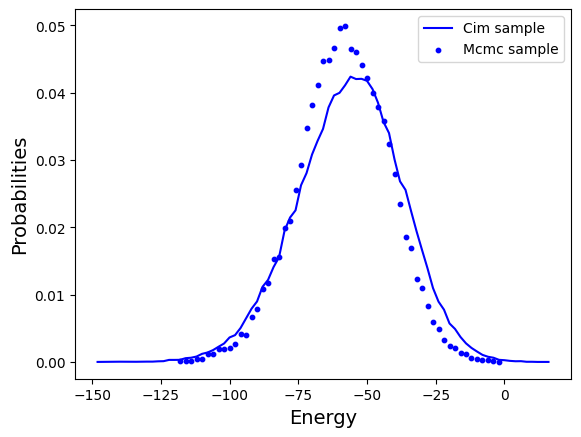

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.linear_model import TheilSenRegressor
from scipy import stats
noise=0.19
a=0.8
b=0.1
NN=90000
n_hid=2
array=np.loadtxt(r'matrix.txt',delimiter=' ', dtype=np.float64) #edge list
data= ising_sample(array,NN, n_hid ,noise,a,b) ##采样cim采样
numbers,P=calculate(data)
x=numbers.flatten()
y=np.log(P.flatten())
coefficients = np.polyfit(x, y, 1)
slope=coefficients[0]
intercept = coefficients[1]  # 截距
plt.plot(numbers, P,c='blue',label="Cim sample")
data2=mcmc_sample(NN,n_hid,array) ##采样mcmc采样
numbers,P=calculate(data2)
plt.scatter(numbers, P,c='blue',s=10,label='Mcmc sample')
plt.xlabel('Energy', fontsize=14)
plt.ylabel('Probabilities', fontsize=14)
# 显示图例
plt.legend()